# Importing the necessary libraries

In [1]:
#importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Load Data

In [2]:
#loading the data into jupyter notebook
#Giving names to the columns in the data
columns = [ "SepalLengthCm", "SepalWidthCm","PetalLenghtCm", "PetalWidthCm","Species"]
irisdata = pd.read_csv(r"iris.csv", names = columns)

In [3]:
irisdata.head()

,SepalLengthCm,SepalWidthCm,PetalLenghtCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#checking for any null values in the data
irisdata.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLenghtCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [5]:
#checking the data type of each column
irisdata.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLenghtCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
#getting a mathematical description of every column
irisdata.describe()

,SepalLengthCm,SepalWidthCm,PetalLenghtCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#getting the shape of the data
irisdata.shape

(150, 5)

In [8]:
#class distribution
irisdata.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Visualize Data

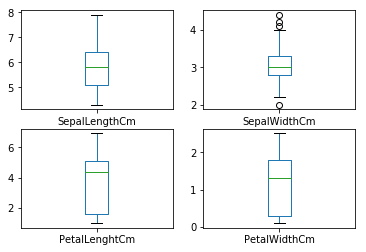

In [9]:
#box and whisker plots
irisdata.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

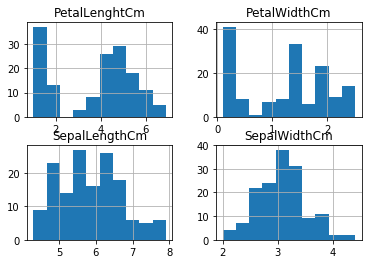

In [10]:
#visualizing each feature using histogram
irisdata.hist()
plt.show()

C:\Users\JADESOLA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


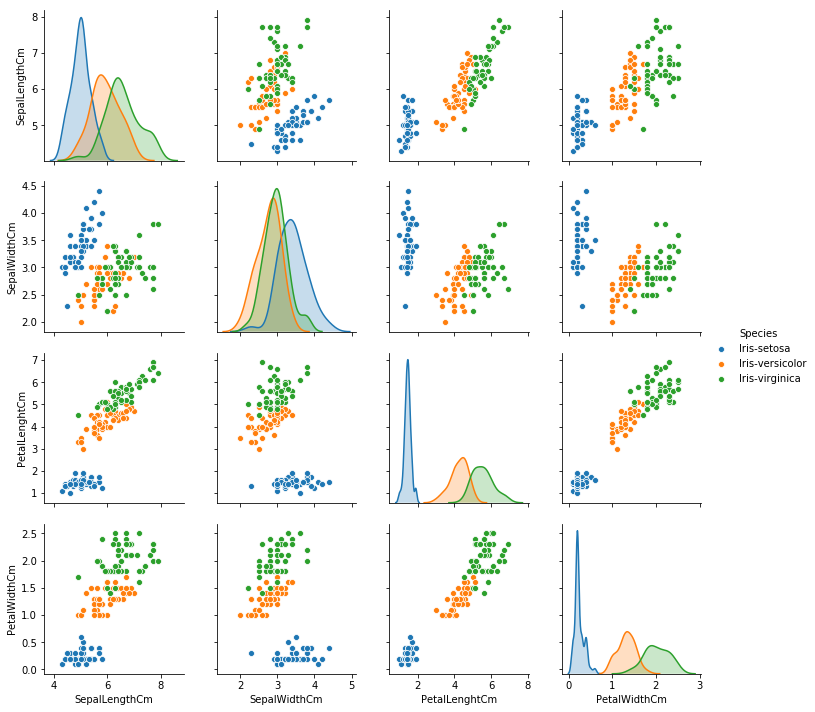

In [11]:
#visualizing each feature against eachother using seaborn
sns.pairplot (irisdata, hue = "Species")

In [12]:
#dividing the data into features(X) and target(y)
X = irisdata[["SepalLengthCm", "SepalWidthCm","PetalLenghtCm", "PetalWidthCm"]].values
y = irisdata["Species"].values

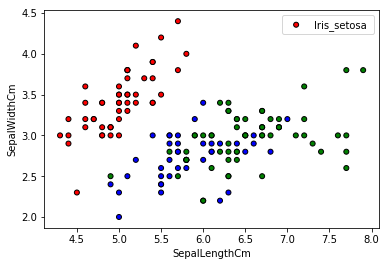

In [13]:
#plotting scatter plots of the features against eachother using matplotlib
#plotting the sepalwidth against the sepallength
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}
plt.scatter(X[:, 0], X[:, 1], c=[colors[_y] for _y in y], s=25, edgecolors='k')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend(['Iris_setosa ', 'Iris-versicolor', 'Iris-virginica'], loc="upper right")
plt.show()

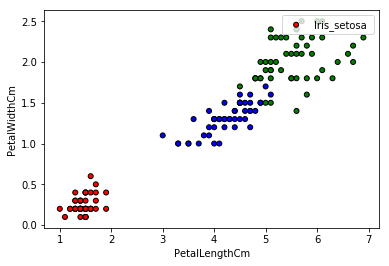

In [14]:
#plotting the petalwidth against the petallength
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}
plt.scatter(X[:, 2], X[:, 3], c=[colors[_y] for _y in y], s=25, edgecolors='k')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend(['Iris_setosa ', 'Iris-versicolor', 'Iris-virginica'], loc="upper right")
plt.show()

# Split data

In [15]:
import collections
from sklearn.model_selection import train_test_split

In [16]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15
SHUFFLE = True

In [17]:
#the shape of the input(features)
X.shape

(150, 4)

In [18]:
#the shape of the target
y.shape

(150,)

In [19]:
def train_val_test_split(X, y, val_size, test_size, shuffle):
    """Split data into train/val/test datasets.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, shuffle=shuffle) # notice the `stratify=y`
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=val_size, stratify=y_train, shuffle=shuffle) # notice the `stratify=y_train`
    return X_train, X_val, X_test, y_train, y_val, y_test

In [20]:
# Create data splits
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X=X, y=y, val_size=VAL_SIZE, test_size=TEST_SIZE, shuffle=SHUFFLE)
class_counts = dict(collections.Counter(y))
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"Sample point: {X_train[80]} → {y_train[80]}")
print (f"Classes: {class_counts}") 

X_train: (107, 4), y_train: (107,)
X_val: (20, 4), y_val: (20,)
X_test: (23, 4), y_test: (23,)
Sample point: [6.7 3.1 5.6 2.4] → Iris-virginica
Classes: {'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}


In [21]:
print (f"y_train[0]: {y_train[0]}") # viewing y before encoding

y_train[0]: Iris-setosa


# Standardize Data

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)

In [24]:
# Apply scaler on training and test data (don't standardize outputs for classification)
X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

In [25]:
# Checking the meadn and std to confirm standardization (mean should be ~0 and std should be ~1)
print (f"X_train[0]: mean: {np.mean(X_train[:, 0], axis=0):.1f}, std: {np.std(X_train[:, 0], axis=0):.1f}")
print (f"X_train[1]: mean: {np.mean(X_train[:, 1], axis=0):.1f}, std: {np.std(X_train[:, 1], axis=0):.1f}")
print (f"X_train[2]: mean: {np.mean(X_train[:, 2], axis=0):.1f}, std: {np.std(X_train[:, 2], axis=0):.1f}")
print (f"X_train[3]: mean: {np.mean(X_train[:, 3], axis=0):.1f}, std: {np.std(X_train[:, 3], axis=0):.1f}")
print (f"X_val[0]: mean: {np.mean(X_val[:, 0], axis=0):.1f}, std: {np.std(X_val[:, 0], axis=0):.1f}")
print (f"X_val[1]: mean: {np.mean(X_val[:, 1], axis=0):.1f}, std: {np.std(X_val[:, 1], axis=0):.1f}")
print (f"X_val[2]: mean: {np.mean(X_val[:, 2], axis=0):.1f}, std: {np.std(X_val[:, 2], axis=0):.1f}")
print (f"X_val[3]: mean: {np.mean(X_val[:, 3], axis=0):.1f}, std: {np.std(X_val[:, 3], axis=0):.1f}")
print (f"X_test[0]: mean: {np.mean(X_test[:, 0], axis=0):.1f}, std: {np.std(X_test[:, 0], axis=0):.1f}")
print (f"X_test[1]: mean: {np.mean(X_test[:, 1], axis=0):.1f}, std: {np.std(X_test[:, 1], axis=0):.1f}")
print (f"X_test[2]: mean: {np.mean(X_test[:, 2], axis=0):.1f}, std: {np.std(X_test[:, 2], axis=0):.1f}")
print (f"X_test[3]: mean: {np.mean(X_test[:, 3], axis=0):.1f}, std: {np.std(X_test[:, 3], axis=0):.1f}")

X_train[0]: mean: -0.0, std: 1.0
X_train[1]: mean: 0.0, std: 1.0
X_train[2]: mean: -0.0, std: 1.0
X_train[3]: mean: 0.0, std: 1.0
X_val[0]: mean: 0.1, std: 1.0
X_val[1]: mean: -0.1, std: 0.9
X_val[2]: mean: 0.1, std: 1.0
X_val[3]: mean: 0.2, std: 1.0
X_test[0]: mean: -0.1, std: 0.9
X_test[1]: mean: 0.1, std: 1.1
X_test[2]: mean: -0.0, std: 1.0
X_test[3]: mean: -0.0, std: 1.0


# Comparing different architectures

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [42]:
#making all the algorithms to a list
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class = 'ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [45]:
#evaluating each model one by one
results = []
names = []
for name,model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle =True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring ='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))

LR: 0.901263 (0.096022)
KNN: 0.945707 (0.071168)
DTC: 0.955556 (0.069389)
NB: 0.946465 (0.068924)
SVM: 0.965909 (0.056004)


In [59]:
#making predictions
for name, model in models:
    model.fit(X_train,y_train)
    prediction_val = model.predict(X_val)
    prediction_test = model.predict(X_test)
    #evaluating predictions
    print('%s:' %(name), f"val_acc:{accuracy_score(y_val,prediction_val):.2f},test_acc:{accuracy_score(y_test,prediction_test):.2f}")
    print('%s:' %(name), 'Cmatrix_val:',confusion_matrix(y_val,prediction_val),'Cmatrix_test:',confusion_matrix(y_test,prediction_test))
    print('%s:' %(name), 'class_val_report: \n',classification_report(y_val,prediction_val),'class_test_report: \n',classification_report(y_test,prediction_test))

LR: val_acc:0.85,test_acc:0.91
LR: Cmatrix_val: [[5 1 0]
 [0 5 2]
 [0 0 7]] Cmatrix_test: [[8 0 0]
 [0 7 1]
 [0 1 6]]
LR: class_val_report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      0.83      0.91         6
Iris-versicolor       0.83      0.71      0.77         7
 Iris-virginica       0.78      1.00      0.88         7

      micro avg       0.85      0.85      0.85        20
      macro avg       0.87      0.85      0.85        20
   weighted avg       0.86      0.85      0.85        20
 class_test_report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.86      0.86      0.86         7

      micro avg       0.91      0.91      0.91        23
      macro avg       0.91      0.91      0.91        23
   weighted avg       0.91      0.91      0.91        23

KNN: val_acc:0.90,test_acc:0.91
K

# Using one-hot encoder

In [67]:
#importing the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [68]:
#reshaping the y_train,y_test and y_val to aabs 2D array
y_train = y_train.reshape(107,1)
y_val = y_val.reshape(20,1)
y_test = y_test.reshape(23,1)

In [69]:
#encoding the output variables
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit(y_train)
y_train = onehot_encoder.transform(y_train)
y_test = onehot_encoder.transform(y_test)
print (f"y_train_shape: {y_train.shape}")
print (f"y_train[0]: {y_train[:2,:]}")

y_train_shape: (107, 3)
y_train[0]: [[1. 0. 0.]
 [1. 0. 0.]]


# Logistic Regression from scratch

In [71]:
#initiallizing weights
INPUT_DIM = X_train.shape[1] # X is 2-dimensional
NUM_CLASSES = 3 # y has three possibilities

In [72]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, NUM_CLASSES)
b = np.zeros((1, NUM_CLASSES))
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (4, 3)
b: (1, 3)


In [73]:
#defining the model
# Forward pass [NXinput_dim] · [input_dimXnum_class] + [1,num_class] = [NXnum_class]
z = np.dot(X_train, W) + b
print (f"z: {z.shape}")
print (f"sample: {z[0]}")

z: (107, 3)
sample: [ 0.00341616 -0.03312759  0.00063358]


In [116]:
def sigmoid(z):
    return 1/ (1+ np.exp(-z))

In [74]:
# Normalization via softmax to obtain class probabilities
exp_z = np.exp(z)
y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)
print (f"y_hat_shape: {y_hat.shape}")
print (f"sample: {y_hat[0]}")

y_hat_shape: (107, 3)
sample: [0.33768529 0.32556776 0.33674695]


In [75]:
#changing the type of y_train 
print (f"y_train[0]: {y_train[7]}")
y_train = y_train.astype(np.int32)
y_train.dtype
y_train.shape

y_train[0]: [0. 0. 1.]


(107, 3)

In [78]:
# Loss using the initialized random weights
correct_class_logprobs = -np.log(y_hat[np.array(np.ix_(range(len(y_hat)))).T,y_train])
loss = np.sum(correct_class_logprobs) / (len(y_train))
print (f"loss: {loss:.2f}")
print(len(y_train))
print(np.sum(correct_class_logprobs))
#print(correct_class_logprobs)

loss: 3.30
107
352.6891542746879


In [80]:
#loss
loss = (-y_train*np.log(y_hat)-(1-y_train)*np.log(1-y_hat)).mean()
loss

0.6340009775331358

In [81]:
# Backpropagation
dloss = y_hat
dloss[np.array(np.ix_(range(len(y_hat)))).T, y_train] -= 1
dloss /= len(y_train)
dW = np.dot(X_train.T, dloss)
db = np.sum(dloss, axis=0, keepdims=True)

In [82]:
#Bacprob
dloss = np.dot(X_train.T,(y_hat-y_train))/y_train.size
db = np.sum(dloss, axis=0, keepdims=True)

In [124]:
LEARNING_RATE = 1e-1

In [125]:
# Updating weights
W += -LEARNING_RATE * dloss
b += -LEARNING_RATE * db

In [126]:
NUM_EPOCHS = 50

# Training

In [127]:
#Putting everything together fot training
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, NUM_CLASSES)
b = np.zeros((1, NUM_CLASSES))

# Training loop
for epoch_num in range(NUM_EPOCHS):

    # Forward pass [NXinput_dim] · [input_dimXnum_class] + [1,num_class] = [NXnum_class]
    z = np.dot(X_train, W) + b
    
    
    # Normalization via sigmoid to obtain class probabilities
    y_hat = sigmoid(z)
    #y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    #loss
    loss = (-y_train*np.log(y_hat)-(1-y_train)*np.log(1-y_hat)).mean()


    # show progress
    if epoch_num%10 == 0:
        # Accuracy
        y_pred = np.argmax(z, axis=1)
        accuracy = np.count_nonzero((np.equal(y_train,np.array(np.ix_(y_pred)).T))== True)/len(y_pred)
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}, accuracy: {accuracy:.3f}")
           
    #Bacpropagation
    dloss = np.dot(X_train.T,(y_hat-y_train))/y_train.size
    db = np.sum(dloss, axis=0, keepdims=True)

    # Update weights
    W += -LEARNING_RATE * dloss
    b += -LEARNING_RATE * db

Epoch: 0, loss: 0.691, accuracy: 1.093
Epoch: 10, loss: 0.610, accuracy: 0.673
Epoch: 20, loss: 0.567, accuracy: 0.673
Epoch: 30, loss: 0.544, accuracy: 0.673
Epoch: 40, loss: 0.532, accuracy: 0.673


In [128]:
#from sklearn.metrics import accuracy_score
#acc = accuracy_score(y_train,y_hat)
y_hat


array([[0.69006895, 0.37011603, 0.44714018],
       [0.66339228, 0.40917946, 0.43883992],
       [0.06980458, 0.51755153, 0.92765941],
       [0.69214531, 0.35388306, 0.46163122],
       [0.64496443, 0.42510104, 0.44178701],
       [0.671006  , 0.42399341, 0.41643805],
       [0.69814702, 0.42419771, 0.38594124],
       [0.08256403, 0.35952533, 0.95179465],
       [0.16053883, 0.48490615, 0.85155959],
       [0.70049732, 0.35414103, 0.45183514],
       [0.09807755, 0.5761445 , 0.87489641],
       [0.13639767, 0.51714655, 0.85894617],
       [0.15683711, 0.48137481, 0.85621631],
       [0.78339489, 0.31511654, 0.38723256],
       [0.67314958, 0.406924  , 0.43070925],
       [0.18476554, 0.45135582, 0.8465985 ],
       [0.71073212, 0.27597277, 0.52512426],
       [0.7091602 , 0.29439198, 0.50640398],
       [0.21430959, 0.56044354, 0.75221042],
       [0.13575436, 0.51319122, 0.86252853],
       [0.09765817, 0.44500283, 0.92048013],
       [0.24602791, 0.52211084, 0.74852467],
       [0.

In [129]:
class LogisticRegression():
    def predict(self, x):
        z = np.dot(x, W) + b
        y_hat = sigmoid(z)
        return y_hat

In [136]:
# Evaluation
model = LogisticRegression()
input_train = model.predict(X_train)
pred_train = np.argmax(input_train, axis=1)
y_train_max = np.argmax(y_train, axis=1)
output_val = model.predict(X_val)
pred_val = np.argmax(output_val, axis=1)
y_val_max = np.argmax(y_val,axis=1)

In [137]:
(pred_train == y_train_max)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False,  True, False,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True, False, False,  True, False,  True,  True,
       False,  True, False,  True, False,  True,  True, False])

In [138]:
(pred_val == y_val_max)

array([ True, False, False,  True, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True, False])

In [139]:
y_pred1=y_pred1.reshape(23,1)
onehot_encoder.inverse_transform(y_pred1)

ValueError: could not convert string to float: 'Iris-virginica'

In [61]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred1)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [118]:
# Training and test accuracy
train_acc =  np.mean(np.equal(y_train,np.array(np.ix_(pred_train)).T))
val_acc = np.mean(np.equal(y_val,np.array(np.ix_(pred_val)).T))
print (f"train acc: {train_acc:.2f}, val acc: {val_acc:.2f}")

train acc: 0.51, val acc: 0.00


In [119]:
#testing for the accuracy of the model
from sklearn.metrics import classification_report
cr = classification_report(y_val, pred_val)
print(cr)

ValueError: Mix of label input types (string and number)

In [65]:
#Defining dataset
X_train,y_train = make_classification(n_samples = 107, n_features = 4, n_redundant = 0, n_repeated = 0,
                                      n_informative = 4, n_classes = 3,n_clusters_per_class = 1)

In [66]:
# defining classification model
multiclass_model = LogisticRegression(multi_class='ovr')

In [67]:
#fit model
multiclass_model.fit(X_train,y_train)

C:\Users\JADESOLA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
y_pred = multiclass_model.predict(X_train)

In [70]:
y_pred

array([2, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 1, 0,
       2, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2,
       1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 2, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1])